In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import lightgbm as lgb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import export_graphviz
import graphviz
import os

# seed
import os
seed = 123
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
train = pd.read_csv('data/train.csv')

In [6]:
x_en = train['letter'].copy()
en = LabelEncoder()
en.fit(x_en)
train['letter'] = en.transform(x_en)
x = train[train.columns.difference(['id','digit'])]

y = train['digit']
#y = y[:,np.newaxis]
#y = np.reshape(y, (-1, 1))
#en = OneHotEncoder()
#y = en.fit_transform(y).toarray()

print(x.shape)
print(y.shape)

(2048, 785)
(2048,)


In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, shuffle=True)
#, stratify=y_total)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1638, 785)
(410, 785)
(1638,)
(410,)


In [8]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, 
                              random_state=seed, min_samples_leaf=1, 
                              min_samples_split=2, splitter='best')

In [9]:
tree_fit = tree.fit(x_train, y_train)


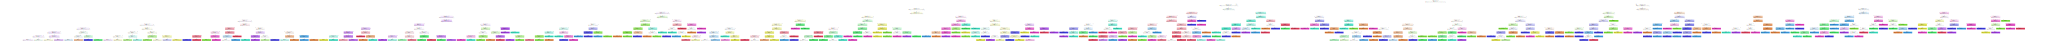

In [10]:
export_graphviz(tree, out_file='tree.dot', feature_names=None, 
                impurity=False, filled=True)
with open('tree.dot','r',encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

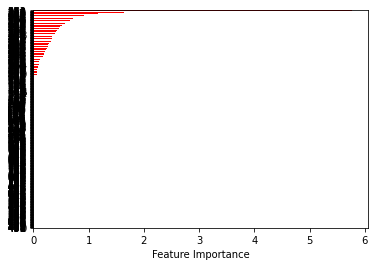

In [11]:
Importance = pd.DataFrame({'Importance':tree.feature_importances_*100}) 
                          #index = x_train.columns)

Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(
    kind = 'barh', color = 'r', )

plt.xlabel('Feature Importance')
plt.gca().legend_ = None